#`ExhaustiveFeature selection`

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,LogisticRegression

In [ ]:
# ! pip install --upgrade scikit-learn mlxtend

In [ ]:
df=pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as ef
lr=LogisticRegression()
sel=ef(lr,max_features=4,cv=5,scoring='accuracy')

In [ ]:
model=sel.fit(df.iloc[:,:4],df['species'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Features: 15/15

In [ ]:
model.best_score_

0.9733333333333334

In [ ]:
model.best_feature_names_

('sepal_length', 'sepal_width', 'petal_length', 'petal_width')

In [ ]:
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': 0.7533333333333333,
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.53333333, 0.63333333]),
  'avg_score': 0.5599999999999999,
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.96,
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.9       ]),
  'avg_score': 0.8200000000000001,
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([0.93333333, 1.        , 0.9   

In [ ]:
metrics_df=pd.DataFrame.from_dict(model.get_metric_dict()).T
metrics_df=metrics_df.sort_values('avg_score',ascending=False)

In [ ]:
metrics_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
14,"(0, 1, 2, 3)","[0.9666666666666667, 1.0, 0.9333333333333333, ...",0.973333,"(sepal_length, sepal_width, petal_length, peta...",0.032061,0.024944,0.012472
12,"(0, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal_length, petal_length, petal_width)",0.027096,0.021082,0.010541
13,"(1, 2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.966667,"(sepal_width, petal_length, petal_width)",0.027096,0.021082,0.010541
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
10,"(0, 1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, sepal_width, petal_length)",0.051412,0.04,0.02


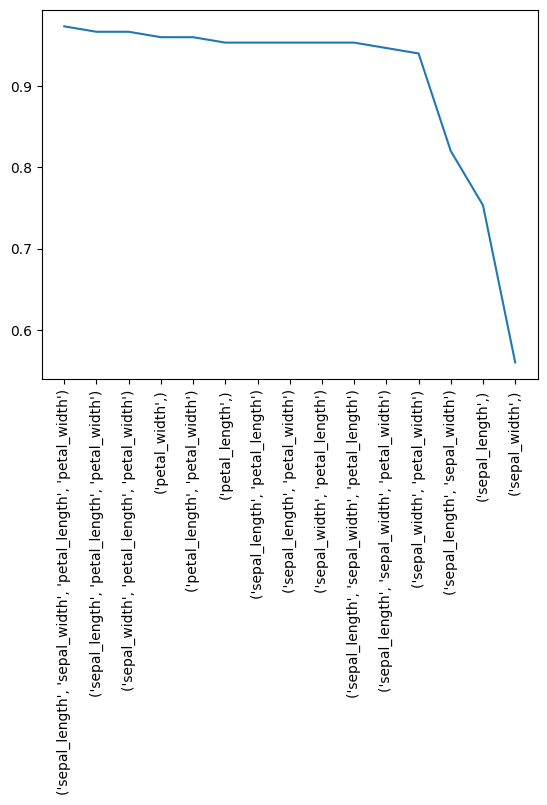

In [ ]:
import matplotlib.pyplot as plt
plt.plot([str(k) for k in metrics_df['feature_names']],metrics_df['avg_score'])
plt.xticks(rotation=90)
plt.show()

#`Regression Problem`

In [ ]:
df=pd.read_csv('/content/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df['medv'],test_size=0.2)

In [ ]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
228,0.29819,0.0,6.20,0,0.5040,7.686,17.0,3.3751,8,307,17.4,377.51,3.92
416,10.83420,0.0,18.10,0,0.6790,6.782,90.8,1.8195,24,666,20.2,21.57,25.79
474,8.05579,0.0,18.10,0,0.5840,5.427,95.4,2.4298,24,666,20.2,352.58,18.14
89,0.05302,0.0,3.41,0,0.4890,7.079,63.1,3.4145,2,270,17.8,396.06,5.70
373,11.10810,0.0,18.10,0,0.6680,4.906,100.0,1.1742,24,666,20.2,396.90,34.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.21038,20.0,3.33,0,0.4429,6.812,32.2,4.1007,5,216,14.9,396.90,4.85
413,28.65580,0.0,18.10,0,0.5970,5.155,100.0,1.5894,24,666,20.2,210.97,20.08
354,0.04301,80.0,1.91,0,0.4130,5.663,21.9,10.5857,4,334,22.0,382.80,8.05
278,0.07978,40.0,6.41,0,0.4470,6.482,32.1,4.1403,4,254,17.6,396.90,7.19


In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

In [ ]:
# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(model, X_test, y_test,cv=kfold,scoring='r2')

In [ ]:
## Training cv_score
print(np.mean(cv_scores))

0.6982739151803632


In [ ]:
## testing cv_score
print(np.mean(cv_score))

0.7686576954358456


In [ ]:
lr=LinearRegression()
exh=ef(lr,max_features=13,cv=10,scoring='r2',print_progress=True,n_jobs=-1)

In [ ]:
sel=exh.fit(X_train,y_train)

Features: 8191/8191

In [ ]:
sel.best_score_

0.6967314495699617

In [ ]:
sel.best_feature_names_

('0', '1', '3', '4', '5', '7', '8', '9', '10', '11', '12')

In [ ]:
sel.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.20637989, 0.0018061 , 0.0234757 , 0.11788547, 0.22228845,
         0.11773937, 0.04670406, 0.19614985, 0.09554711, 0.2174457 ]),
  'avg_score': 0.12454217098435971,
  'feature_names': ('0',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([ 0.20144062,  0.01721502,  0.0266873 ,  0.14302929,  0.18495463,
         -0.02157128,  0.1578793 ,  0.23587311,  0.00670007,  0.03997345]),
  'avg_score': 0.09921815084264707,
  'feature_names': ('1',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.36053518, 0.03065642, 0.11437917, 0.22500697, 0.25314041,
         0.14897349, 0.36639908, 0.19126027, 0.17208618, 0.36548019]),
  'avg_score': 0.22279173620614676,
  'feature_names': ('2',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([-0.02714704, -0.01268835,  0.06986715, -0.03097281,  0.01559079,
         -0.08909918, -0.0115562 ,  0.11482857, -0.07735183,  0.06758065]),
  'avg_score': 0.0019051754315381863,
  'feature_names': ('3',)},
 4: {'

In [ ]:
def adj_r2_score(r2,n,num_feature):
  coef=(n-1)/(n-num_feature-1)
  return 1- (1-r2)*coef

In [ ]:
metrics_df=pd.DataFrame.from_dict(sel.get_metric_dict()).T
metrics_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.20637988759746084, 0.0018061043242288966, 0...",0.124542,"(0,)",0.058613,0.078917,0.026306
1,"(1,)","[0.2014406216507324, 0.017215019796269382, 0.0...",0.099218,"(1,)",0.066629,0.089711,0.029904
2,"(2,)","[0.3605351786736347, 0.030656423217223505, 0.1...",0.222792,"(2,)",0.080873,0.108888,0.036296
3,"(3,)","[-0.027147037296514798, -0.012688348742204925,...",0.001905,"(3,)",0.046236,0.062252,0.020751
4,"(4,)","[0.26546413162934834, -0.07140948872126551, 0....",0.184821,"(4,)",0.093443,0.125813,0.041938
...,...,...,...,...,...,...,...
8186,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.6336300782327984, 0.5086525968660516, 0.671...",0.691085,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.063803,0.085906,0.028635
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.6333004407275954, 0.4843809876017152, 0.697...",0.69545,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.071056,0.095671,0.03189
8188,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.640315707374062, 0.4694339460593081, 0.6964...",0.690568,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.069245,0.093232,0.031077
8189,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.6332127429063186, 0.482624256317702, 0.6707...",0.688173,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.071807,0.096682,0.032227


In [ ]:
metrics_df['obervation']=404
metrics_df['num_features'] =metrics_df['feature_idx'].apply(lambda x:len(x))
metrics_df['adj r2 score']=adj_r2_score(metrics_df['avg_score'],metrics_df['obervation'],metrics_df['num_features'] )*100

In [ ]:
metrics_df=metrics_df.sort_values('adj r2 score',ascending=False)

In [ ]:
metrics_df.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,obervation,num_features,adj r2 score
8150,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.6478478747593732, 0.48584992051057063, 0.69...",0.696731,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.07004,0.094303,0.031434,404,11,68.822136
7949,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 12)","[0.6412663992315906, 0.46683517831117394, 0.69...",0.694689,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 12)",0.072626,0.097785,0.032595,404,10,68.692077
8183,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.647832643897947, 0.48569712473561966, 0.696...",0.696053,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.069852,0.094049,0.03135,404,12,68.672519
8187,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.6333004407275954, 0.4843809876017152, 0.697...",0.69545,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.071056,0.095671,0.03189,404,12,68.610355
8115,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12)","[0.6412084487854492, 0.4667728210448615, 0.695...",0.694037,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12)",0.072397,0.097477,0.032492,404,11,68.54512


In [ ]:
X_train=sel.transform(X_train)
X_test=sel.transform(X_test)

In [ ]:
X_train.shape

(404, 11)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(model, X_test, y_test, cv=kfold, scoring='r2')
print('testing_data',np.mean(cv_score))

training_data 0.7016403408712758
testing_data 0.7808682895571257


#` Sequential Backward Elimination`

In [ ]:
df=pd.read_csv('/content/BostonHousing.csv')

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df['medv'],test_size=0.2)

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Set up cross-validation scheme
kfold1 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(lr, X_train, y_train, cv=kfold1, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
kfold2 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(lr, X_test, y_test, cv=kfold2, scoring='r2')
print('testing_data',np.mean(cv_score))

training_data 0.6200448077738059
testing_data 0.6723450321093065


In [ ]:
model=LinearRegression()
from mlxtend.feature_selection import SequentialFeatureSelector as sf
sf=sf(model,k_features='best',forward=False,floating=False,scoring='r2',cv=5)

In [ ]:
sf.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13), scoring='r2')

In [ ]:
sf.k_feature_idx_

(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)

In [ ]:
metrics_df=pd.DataFrame.from_dict(sf.get_metric_dict()).T

In [ ]:
metrics_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.71697099821707, 0.6112131310109463, 0.59291...",0.671195,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.073033,0.056822,0.028411
12,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7071996536537495, 0.6439747765359136, 0.578...",0.673911,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.073237,0.056981,0.028491
11,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7079406362245875, 0.6435802946399664, 0.581...",0.675605,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)",0.074091,0.057645,0.028823
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7064690348671843, 0.6432461221505297, 0.578...",0.675149,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.075603,0.058821,0.029411
9,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.6893438554483918, 0.6757740151617813, 0.567...",0.673081,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.075039,0.058383,0.029191
8,"(0, 4, 5, 7, 8, 9, 10, 12)","[0.6819433431831994, 0.683961027461212, 0.5570...",0.669212,"(0, 4, 5, 7, 8, 9, 10, 12)",0.078837,0.061338,0.030669
7,"(4, 5, 7, 8, 9, 10, 12)","[0.6867566872179665, 0.7100433736839455, 0.535...",0.664742,"(4, 5, 7, 8, 9, 10, 12)",0.086548,0.067337,0.033669
6,"(4, 5, 7, 8, 10, 12)","[0.6984898131807304, 0.7051349146550847, 0.524...",0.660041,"(4, 5, 7, 8, 10, 12)",0.090125,0.070121,0.03506
5,"(4, 5, 7, 10, 12)","[0.6948971186701597, 0.7028140551571276, 0.521...",0.659376,"(4, 5, 7, 10, 12)",0.092161,0.071705,0.035852
4,"(5, 7, 10, 12)","[0.6721841106808668, 0.6408326703010998, 0.479...",0.634316,"(5, 7, 10, 12)",0.102743,0.079937,0.039969


In [ ]:
metrics_df['obervation']=404
metrics_df['num_features'] =metrics_df['feature_idx'].apply(lambda x:len(x))
metrics_df['adj r2 score']=adj_r2_score(metrics_df['avg_score'],metrics_df['obervation'],metrics_df['num_features'] )*100

In [ ]:
metrics_df.sort_values('adj r2 score',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,obervation,num_features,adj r2 score
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7064690348671843, 0.6432461221505297, 0.578...",0.675149,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.075603,0.058821,0.029411,404,10,66.688332
11,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7079406362245875, 0.6435802946399664, 0.581...",0.675605,"(0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)",0.074091,0.057645,0.028823,404,11,66.650205
9,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.6893438554483918, 0.6757740151617813, 0.567...",0.673081,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.075039,0.058383,0.029191,404,9,66.561368
12,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7071996536537495, 0.6439747765359136, 0.578...",0.673911,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.073237,0.056981,0.028491,404,12,66.390289
8,"(0, 4, 5, 7, 8, 9, 10, 12)","[0.6819433431831994, 0.683961027461212, 0.5570...",0.669212,"(0, 4, 5, 7, 8, 9, 10, 12)",0.078837,0.061338,0.030669,404,8,66.25129
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.71697099821707, 0.6112131310109463, 0.59291...",0.671195,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.073033,0.056822,0.028411,404,13,66.023438
7,"(4, 5, 7, 8, 9, 10, 12)","[0.6867566872179665, 0.7100433736839455, 0.535...",0.664742,"(4, 5, 7, 8, 9, 10, 12)",0.086548,0.067337,0.033669,404,7,65.88162
5,"(4, 5, 7, 10, 12)","[0.6948971186701597, 0.7028140551571276, 0.521...",0.659376,"(4, 5, 7, 10, 12)",0.092161,0.071705,0.035852,404,5,65.509667
6,"(4, 5, 7, 8, 10, 12)","[0.6984898131807304, 0.7051349146550847, 0.524...",0.660041,"(4, 5, 7, 8, 10, 12)",0.090125,0.070121,0.03506,404,6,65.490324
4,"(5, 7, 10, 12)","[0.6721841106808668, 0.6408326703010998, 0.479...",0.634316,"(5, 7, 10, 12)",0.102743,0.079937,0.039969,404,4,63.064987


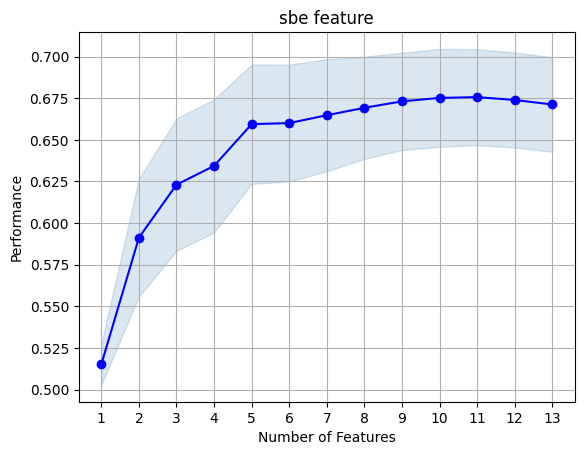

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as p
fig=p(sf.get_metric_dict(),kind='std_err')
plt.title('sbe feature')
plt.grid()
plt.show()

In [ ]:
X_train=sf.transform(X_train)
X_test=sf.transform(X_test)

In [ ]:
model1=LinearRegression()

In [ ]:
model1.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Set up cross-validation scheme
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model1, X_train, y_train, cv=kfold, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(model1, X_test, y_test, cv=kfold, scoring='r2')
print('testing_data',np.mean(cv_score))

training_data 0.6222209332669968
testing_data 0.6520302311215501


#`Squencial forward selection`

training_data 0.7182918029746362
testing 0.6294992641703987
(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)


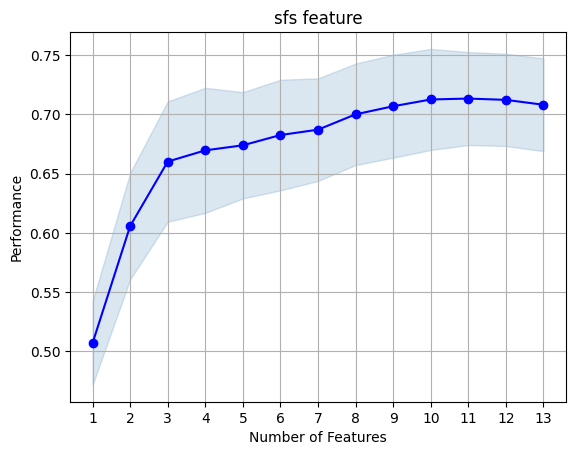

training_data 0.7222079253570268
testing 0.6403385929912734


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

df.head()

df.shape

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df['medv'],test_size=0.2)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

lr=LinearRegression()
lr.fit(X_train,y_train)

# Set up cross-validation scheme
kfold1 = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(lr, X_train, y_train, cv=kfold1, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
print("testing",np.mean(cross_val_score(lr, X_test, y_test, cv=5, scoring='r2')))

model=LinearRegression()
from mlxtend.feature_selection import SequentialFeatureSelector as sf
sf=sf(model,k_features='best',forward=True,floating=False,scoring='r2',cv=5)

sf.fit(X_train,y_train)

print(sf.k_feature_idx_)

metrics_df=pd.DataFrame.from_dict(sf.get_metric_dict()).T

metrics_df
def adj_r2_score(r2,n,num_feature):
  coef=(n-1)/(n-num_feature-1)
  return 1- (1-r2)*coef
metrics_df['obervation']=404
metrics_df['num_features'] =metrics_df['feature_idx'].apply(lambda x:len(x))
metrics_df['adj r2 score']=adj_r2_score(metrics_df['avg_score'],metrics_df['obervation'],metrics_df['num_features'] )*100

metrics_df.sort_values('adj r2 score',ascending=False)

from mlxtend.plotting import plot_sequential_feature_selection as p
fig=p(sf.get_metric_dict(),kind='std_err')
plt.title('sfs feature')
plt.grid()
plt.show()

X_train_sel=sf.transform(X_train)
X_test_sel=sf.transform(X_test)

model1=LinearRegression()

model1.fit(X_train,y_train)

# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model1,X_train_sel, y_train, cv=kfold, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
print("testing",np.mean(cross_val_score(model1, X_test_sel, y_test, cv=5, scoring='r2')))

#`from sklearn`

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs
sfs=sfs(model,n_features_to_select=5,direction='forward',scoring='r2',cv=5,n_jobs=-1)
sfs.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5,
                          n_jobs=-1, scoring='r2')

In [ ]:
np.arange(df.iloc[:,:-1].shape[1])[sfs.support_]

array([ 5,  7, 10, 11, 12])

#`Another Data`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression,LogisticRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector,SequentialFeatureSelector

In [ ]:
df1=pd.read_csv('/content/winequalityN.csv')
df1.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df1['quality'].value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1['type']=le.fit_transform(df1['type'])

In [ ]:
df1.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df1.isna().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [ ]:
df1=df1.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df1.iloc[:,:-1],df1['quality'],test_size=0.2)

In [ ]:
X_train

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
5649,0,8.3,0.650,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5
594,1,6.4,0.475,0.06,1.0,0.030,9.0,131.0,0.99040,2.97,0.29,10.8
6251,0,7.6,0.645,0.03,1.9,0.086,14.0,57.0,0.99690,3.37,0.46,10.3
5851,0,10.2,0.340,0.48,2.1,0.052,5.0,9.0,0.99458,3.20,0.69,12.1
1374,1,6.9,0.230,0.34,2.7,0.032,24.0,121.0,0.99020,3.14,0.38,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...
6244,0,6.1,0.590,0.01,2.1,0.056,5.0,13.0,0.99472,3.52,0.56,11.4
3965,1,7.3,0.380,0.23,6.5,0.050,18.0,102.0,0.99304,3.10,0.55,11.2
3407,1,6.1,0.330,0.32,7.8,0.052,52.0,183.0,0.99657,3.39,0.65,9.5
1887,1,7.3,0.240,0.41,13.6,0.050,41.0,178.0,0.99880,3.37,0.43,9.7


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(lr,X_train, y_train, cv=kfold, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(lr,X_test, y_test, cv=kfold, scoring='r2')
print('test_data',np.mean(cv_scores))

training_data 0.29631322048378317
test_data 0.26764724535013673


In [ ]:
efs=ExhaustiveFeatureSelector(lr,max_features=12,cv=5,scoring='r2',print_progress=True,n_jobs=-1)
sel=efs.fit(X_train,y_train)

Features: 4095/4095

In [ ]:
sel.best_score_

0.29828092596215716

In [ ]:
sel.best_feature_names_

('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11')

In [ ]:
sel.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.01260189, 0.02900407, 0.013418  , 0.01481541, 0.01041006]),
  'avg_score': 0.01604988713759068,
  'feature_names': ('0',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.00309313, 0.00199407, 0.00698063, 0.00684136, 0.00848875]),
  'avg_score': 0.005479588611613595,
  'feature_names': ('1',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.07633272, 0.10117507, 0.06687849, 0.07142151, 0.07395235]),
  'avg_score': 0.07795202805683776,
  'feature_names': ('2',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.0094543 , 0.00991295, 0.00742978, 0.00233953, 0.0060586 ]),
  'avg_score': 0.007039033078304535,
  'feature_names': ('3',)},
 4: {'feature_idx': (4,),
  'cv_scores': array([ 7.62802240e-05, -5.05635769e-03,  2.30299613e-03,  6.75225431e-04,
          2.45249498e-03]),
  'avg_score': 9.01278142934503e-05,
  'feature_names': ('4',)},
 5: {'feature_idx': (5,),
  'cv_scores': array([0.02907228, 0.05281584, 0.02982315, 0.0510806

In [ ]:
def adj_r2_score(r2,n,num_feature):
  coef=(n-1)/(n-num_feature-1)
  return 1- (1-r2)*coef

In [ ]:
metrics_df=pd.DataFrame.from_dict(sel.get_metric_dict()).T
metrics_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.012601893140950615, 0.029004074024363113, 0...",0.01605,"(0,)",0.008525,0.006633,0.003316
1,"(1,)","[0.003093131188366516, 0.0019940735602447246, ...",0.00548,"(1,)",0.003201,0.00249,0.001245
2,"(2,)","[0.07633271793912277, 0.10117507354206323, 0.0...",0.077952,"(2,)",0.015458,0.012027,0.006013
3,"(3,)","[0.00945430145055337, 0.009912951957772864, 0....",0.007039,"(3,)",0.00351,0.002731,0.001366
4,"(4,)","[7.628022396166667e-05, -0.005056357692874824,...",0.00009,"(4,)",0.003511,0.002732,0.001366
...,...,...,...,...,...,...,...
4090,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11)","[0.2824883920941923, 0.3066861767933309, 0.309...",0.2982,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11)",0.028328,0.02204,0.01102
4091,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[0.24596916841831273, 0.2495232015590415, 0.27...",0.258759,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11)",0.037445,0.029133,0.014567
4092,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[0.27881972873748984, 0.29764335297896627, 0.3...",0.294112,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)",0.022835,0.017766,0.008883
4093,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[0.27681126485591157, 0.3009236593483551, 0.31...",0.29337,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)",0.030275,0.023555,0.011777


In [ ]:
X_train.shape

(5170, 12)

In [ ]:
metrics_df['obervation']=404
metrics_df['num_features'] =metrics_df['feature_idx'].apply(lambda x:len(x))
metrics_df['adj r2 score']=adj_r2_score(metrics_df['avg_score'],metrics_df['obervation'],metrics_df['num_features'] )*100

metrics_df.sort_values('adj r2 score',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,obervation,num_features,adj r2 score
4050,"(0, 1, 2, 4, 6, 7, 8, 9, 10, 11)","[0.28199394265183975, 0.3061686586532898, 0.30...",0.297934,"(0, 1, 2, 4, 6, 7, 8, 9, 10, 11)",0.028453,0.022137,0.011069,404,10,28.006989
2394,"(2, 4, 6, 7, 10, 11)","[0.2765122110383178, 0.29267612910239316, 0.30...",0.290485,"(2, 4, 6, 7, 10, 11)",0.026168,0.02036,0.01018,404,6,27.976157
3871,"(0, 1, 2, 4, 6, 8, 9, 10, 11)","[0.27933491650970166, 0.3074648507137805, 0.30...",0.295841,"(0, 1, 2, 4, 6, 8, 9, 10, 11)",0.026645,0.020731,0.010365,404,9,27.975644
3584,"(0, 2, 4, 6, 7, 8, 10, 11)","[0.2802306406213949, 0.295314380737283, 0.3046...",0.292924,"(0, 2, 4, 6, 7, 8, 10, 11)",0.023658,0.018407,0.009204,404,8,27.860376
2856,"(0, 2, 4, 6, 7, 10, 11)","[0.2778711525606703, 0.29423582600374654, 0.30...",0.29112,"(0, 2, 4, 6, 7, 10, 11)",0.024416,0.018996,0.009498,404,7,27.858969
...,...,...,...,...,...,...,...,...,...,...
255,"(4, 7, 10)","[0.0006233009632462538, -0.005288718826935046,...",0.000548,"(4, 7, 10)",0.004081,0.003175,0.001588,404,3,-0.694829
291,"(7, 9, 10)","[-0.00025105211514930836, -0.00384535392897511...",0.000503,"(7, 9, 10)",0.003365,0.002618,0.001309,404,3,-0.699301
254,"(4, 7, 9)","[-0.0012355966868076163, -0.006144786227603616...",0.000284,"(4, 7, 9)",0.00467,0.003634,0.001817,404,3,-0.72138
260,"(4, 9, 10)","[0.0008585870435153797, -0.004438591171391337,...",0.00022,"(4, 9, 10)",0.00322,0.002505,0.001253,404,3,-0.727865


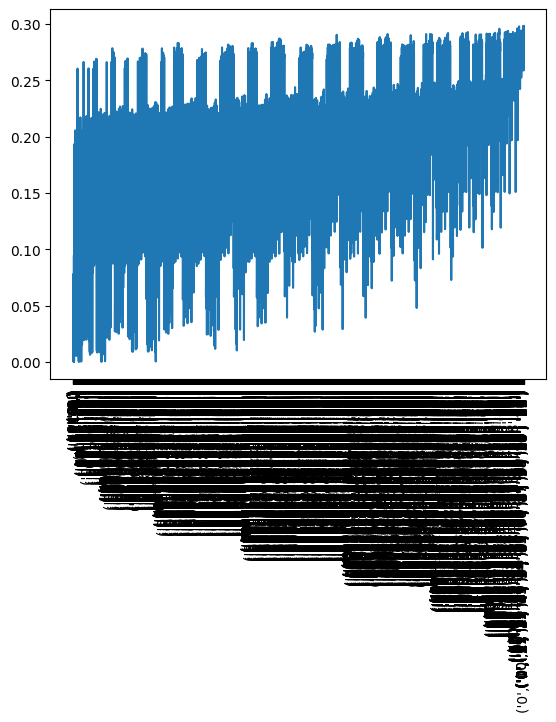

In [ ]:
import matplotlib.pyplot as plt
plt.plot([str(k) for k in metrics_df['feature_names']],metrics_df['avg_score'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
X_train_sel=sel.transform(X_train)
X_test_sel=sel.transform(X_test)

In [ ]:
lr=LinearRegression()
model=lr.fit(X_train_sel,y_train)

In [ ]:
# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model,X_train_sel, y_train, cv=kfold, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(model,X_test_sel, y_test, cv=kfold, scoring='r2')
print('test_data',np.mean(cv_score))

training_data 0.29631322048378317
test_data 0.26764724535013673


training_data 0.2981204908784016
testing 0.2647114437156126
(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11)


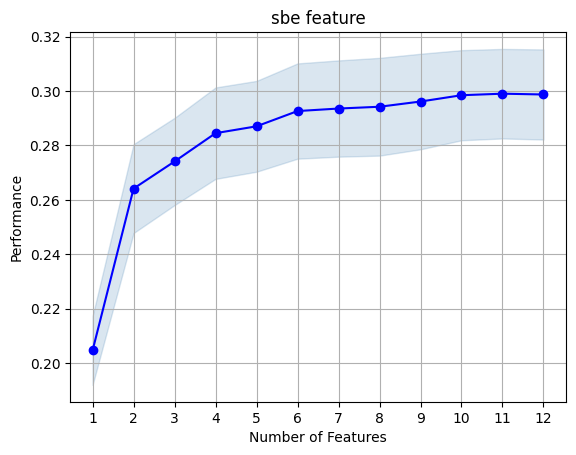

training_data 0.2984906630556089
testing 0.26468867549380437


In [ ]:
df=pd.read_csv('/content/winequalityN.csv')

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df=df.dropna()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df['quality'],test_size=0.2)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

lr=LinearRegression()
lr.fit(X_train,y_train)

# Set up cross-validation scheme
kfold1 = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(lr, X_train, y_train, cv=kfold1, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
print("testing",np.mean(cross_val_score(lr, X_test, y_test, cv=5, scoring='r2')))

model=LinearRegression()
from mlxtend.feature_selection import SequentialFeatureSelector as sf
sf=sf(model,k_features='best',forward=False,floating=False,scoring='r2',cv=5)

sf.fit(X_train,y_train)

print(sf.k_feature_idx_)

metrics_df=pd.DataFrame.from_dict(sf.get_metric_dict()).T

metrics_df
def adj_r2_score(r2,n,num_feature):
  coef=(n-1)/(n-num_feature-1)
  return 1- (1-r2)*coef
metrics_df['obervation']=404
metrics_df['num_features'] =metrics_df['feature_idx'].apply(lambda x:len(x))
metrics_df['adj r2 score']=adj_r2_score(metrics_df['avg_score'],metrics_df['obervation'],metrics_df['num_features'] )*100

metrics_df.sort_values('adj r2 score',ascending=False)

from mlxtend.plotting import plot_sequential_feature_selection as p
fig=p(sf.get_metric_dict(),kind='std_err')
plt.title('sbe feature')
plt.grid()
plt.show()

X_train_sel=sf.transform(X_train)
X_test_sel=sf.transform(X_test)

model1=LinearRegression()

model1.fit(X_train,y_train)

# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model1,X_train_sel, y_train, cv=kfold, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
print("testing",np.mean(cross_val_score(model1, X_test_sel, y_test, cv=5, scoring='r2')))

training_data 0.2948621291639239
testing 0.27724630914387716
(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11)


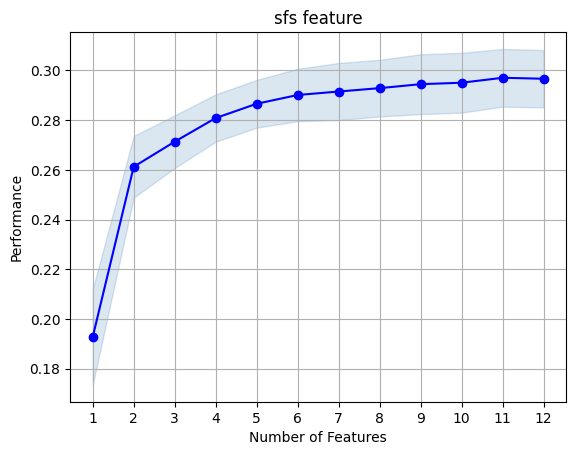

training_data 0.2949920974113274
testing 0.27732839296345896


In [ ]:
df=pd.read_csv('/content/winequalityN.csv')

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df=df.dropna()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df['quality'],test_size=0.2)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

lr=LinearRegression()
lr.fit(X_train,y_train)

# Set up cross-validation scheme
kfold1 = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(lr, X_train, y_train, cv=kfold1, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
print("testing",np.mean(cross_val_score(lr, X_test, y_test, cv=5, scoring='r2')))

model=LinearRegression()
from mlxtend.feature_selection import SequentialFeatureSelector as sf
sf=sf(model,k_features='best',forward=True,floating=False,scoring='r2',cv=5)

sf.fit(X_train,y_train)

print(sf.k_feature_idx_)

metrics_df=pd.DataFrame.from_dict(sf.get_metric_dict()).T

metrics_df
def adj_r2_score(r2,n,num_feature):
  coef=(n-1)/(n-num_feature-1)
  return 1- (1-r2)*coef
metrics_df['obervation']=404
metrics_df['num_features'] =metrics_df['feature_idx'].apply(lambda x:len(x))
metrics_df['adj r2 score']=adj_r2_score(metrics_df['avg_score'],metrics_df['obervation'],metrics_df['num_features'] )*100

metrics_df.sort_values('adj r2 score',ascending=False)

from mlxtend.plotting import plot_sequential_feature_selection as p
fig=p(sf.get_metric_dict(),kind='std_err')
plt.title('sfs feature')
plt.grid()
plt.show()

X_train_sel=sf.transform(X_train)
X_test_sel=sf.transform(X_test)

model1=LinearRegression()

model1.fit(X_train,y_train)

# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model1,X_train_sel, y_train, cv=kfold, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
print("testing",np.mean(cross_val_score(model1, X_test_sel, y_test, cv=5, scoring='r2')))

#`canser dataset`

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)

In [ ]:
y=pd.Series(cancer.target)

In [ ]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
def duplicate_column(df):
  duplicated_columns={}
  for i,col1 in enumerate(df.columns):
    for j in range(i+1,len(df.columns)):
      col2=df.columns[j]
      if df[col1].equals(df[col2]):
        if col1 in duplicated_columns:
          duplicated_columns[col1].append(col2)
        else:
          duplicated_columns[col1]=[col2]
  return duplicated_columns

In [ ]:
duplicate_column(X)

{}

training_data 0.7230424053213151
testing 0.6391752794579237
(3, 5, 7, 9, 10, 14, 19, 20, 21, 23, 27, 28, 29)


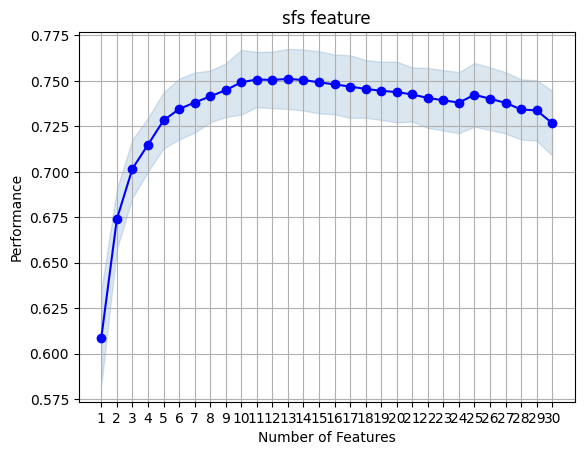

training_data 0.7435227728224045
testing 0.6918953957568894


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

lr=LinearRegression()
lr.fit(X_train,y_train)

# Set up cross-validation scheme
kfold1 = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(lr, X_train, y_train, cv=kfold1, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
print("testing",np.mean(cross_val_score(lr, X_test, y_test, cv=5, scoring='r2')))

model=LinearRegression()
from mlxtend.feature_selection import SequentialFeatureSelector as sf
sf=sf(model,k_features='best',forward=True,floating=False,scoring='r2',cv=5)

sf.fit(X_train,y_train)

print(sf.k_feature_idx_)

metrics_df=pd.DataFrame.from_dict(sf.get_metric_dict()).T

metrics_df
def adj_r2_score(r2,n,num_feature):
  coef=(n-1)/(n-num_feature-1)
  return 1- (1-r2)*coef
metrics_df['obervation']=404
metrics_df['num_features'] =metrics_df['feature_idx'].apply(lambda x:len(x))
metrics_df['adj r2 score']=adj_r2_score(metrics_df['avg_score'],metrics_df['obervation'],metrics_df['num_features'] )*100

metrics_df.sort_values('adj r2 score',ascending=False)

from mlxtend.plotting import plot_sequential_feature_selection as p
fig=p(sf.get_metric_dict(),kind='std_err')
plt.title('sfs feature')
plt.grid()
plt.show()

X_train_sel=sf.transform(X_train)
X_test_sel=sf.transform(X_test)

model1=LinearRegression()

model1.fit(X_train,y_train)

# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model1,X_train_sel, y_train, cv=kfold, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
print("testing",np.mean(cross_val_score(model1, X_test_sel, y_test, cv=5, scoring='r2')))

training_data 0.7019184521856218
testing 0.5494917163948738
(0, 1, 2, 3, 5, 6, 7, 8, 11, 14, 16, 17, 20, 23, 24, 26, 29)


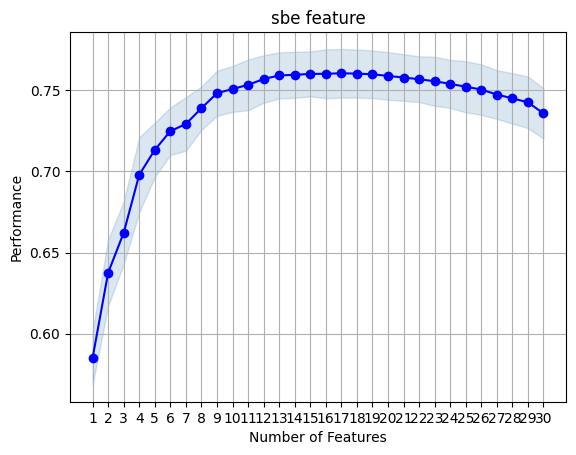

training_data 0.748084180198924
testing 0.624424519318352


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

lr=LinearRegression()
lr.fit(X_train,y_train)

# Set up cross-validation scheme
kfold1 = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(lr, X_train, y_train, cv=kfold1, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
print("testing",np.mean(cross_val_score(lr, X_test, y_test, cv=5, scoring='r2')))

model=LinearRegression()
from mlxtend.feature_selection import SequentialFeatureSelector as sf
sf=sf(model,k_features='best',forward=False,floating=False,scoring='r2',cv=5)

sf.fit(X_train,y_train)

print(sf.k_feature_idx_)

metrics_df=pd.DataFrame.from_dict(sf.get_metric_dict()).T

metrics_df
def adj_r2_score(r2,n,num_feature):
  coef=(n-1)/(n-num_feature-1)
  return 1- (1-r2)*coef
metrics_df['obervation']=404
metrics_df['num_features'] =metrics_df['feature_idx'].apply(lambda x:len(x))
metrics_df['adj r2 score']=adj_r2_score(metrics_df['avg_score'],metrics_df['obervation'],metrics_df['num_features'] )*100

metrics_df.sort_values('adj r2 score',ascending=False)

from mlxtend.plotting import plot_sequential_feature_selection as p
fig=p(sf.get_metric_dict(),kind='std_err')
plt.title('sbe feature')
plt.grid()
plt.show()

X_train_sel=sf.transform(X_train)
X_test_sel=sf.transform(X_test)

model1=LinearRegression()

model1.fit(X_train,y_train)

# Set up cross-validation scheme
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model1,X_train_sel, y_train, cv=kfold, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
print("testing",np.mean(cross_val_score(model1, X_test_sel, y_test, cv=5, scoring='r2')))

In [ ]:
X=X.iloc[:,[3, 5, 7, 9, 10, 14, 19, 20, 21, 23, 27, 28, 29]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(455, 13)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

In [ ]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as ef
efs=ef(model,max_features=13,cv=5,scoring='r2',print_progress=True,n_jobs=-1)

In [ ]:
sel=efs.fit(X_train,y_train)

Features: 8191/8191

In [ ]:
sel.best_score_

0.7521813210211356

In [ ]:
sel.best_feature_names_

('0', '1', '2', '4', '5', '6', '7', '8', '9', '10', '12')

In [ ]:
sel.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.55708573, 0.53872602, 0.5208649 , 0.3943344 , 0.47290124]),
  'avg_score': 0.496782460505074,
  'feature_names': ('0',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.2296055 , 0.32335247, 0.32037488, 0.42571256, 0.45468584]),
  'avg_score': 0.35074625035633317,
  'feature_names': ('1',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.58023777, 0.58933243, 0.57341125, 0.56944212, 0.69001495]),
  'avg_score': 0.6004877080072415,
  'feature_names': ('2',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([-0.01023643, -0.03949208, -0.00516907, -0.00976884, -0.0351021 ]),
  'avg_score': -0.019953704314152488,
  'feature_names': ('3',)},
 4: {'feature_idx': (4,),
  'cv_scores': array([0.34343847, 0.47019732, 0.3501476 , 0.113781  , 0.39566066]),
  'avg_score': 0.33464500987098383,
  'feature_names': ('4',)},
 5: {'feature_idx': (5,),
  'cv_scores': array([ 0.00996671, -0.02482517,  0.0144801 ,  0.01365411, -0.08659334]),
  'avg_scor

In [ ]:
X_train_sel=sel.transform(X_train)
X_test_sel=sel.transform(X_test)

In [ ]:
# Set up cross-validation scheme
kfold1 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model, X_train_sel, y_train, cv=kfold1, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
kfold2 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(model, X_test_sel, y_test, cv=kfold2, scoring='r2')
print('testing_data',np.mean(cv_score))

training_data 0.7539562218453028
testing_data 0.6958961828160015


In [ ]:
X=X.iloc[:,[0, 1, 2, 3, 5, 6, 7, 8, 11, 14, 16, 17, 20, 23, 24, 26, 29]]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

X_train.shape

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.fit_transform(X_test)

lr=LinearRegression()
model=lr.fit(X_train,y_train)

from mlxtend.feature_selection import ExhaustiveFeatureSelector as ef
efs=ef(model,max_features=13,cv=5,scoring='r2',print_progress=True,n_jobs=-1)

In [17]:
sel=efs.fit(X_train,y_train)

sel.best_score_

sel.best_feature_names_

sel.subsets_

X_train_sel=sel.transform(X_train)
X_test_sel=sel.transform(X_test)

# Set up cross-validation scheme
kfold1 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_scores = cross_val_score(model, X_train_sel, y_train, cv=kfold1, scoring='r2')
print('training_data',np.mean(cv_scores))
# Set up cross-validation scheme
kfold2 = KFold(n_splits=10, shuffle=True, random_state=42)
# Perform cross-validation and calculate the scores
cv_score = cross_val_score(model, X_test_sel, y_test, cv=kfold2, scoring='r2')
print('testing_data',np.mean(cv_score))

Features: 130237/130237

training_data 0.74185095571625
testing_data 0.7480623161993065
